# Lungs localization and measurement from CT scanner images

### Sample CT image used retrieved from the Kaggle challenge: https://www.kaggle.com/kmader/finding-lungs-in-ct-data

### Segmentation procedure follows guidelines presented on 'Evaluatin segmentation metrics' example tutorial on Scikit-image.org: https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_metrics.html#sphx-glr-auto-examples-segmentation-plot-metrics-py

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
%matplotlib inline

In [95]:
'''
Read CT image file
'''
from skimage.transform import rescale
#path = './finding-lungs-in-ct-data/2d_images'
path = './'
patient_file = '/ID_0000_Z_0142.tif'
image = imread(path+patient_file, as_gray=True)#.astype('int64')
u_image = imread(path+patient_file, as_gray=True) #.astype('uint16')

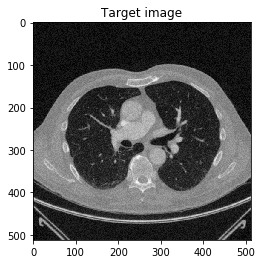

In [126]:
'''
Reduce aliasing with the rescale function
'''
image_rescaled = rescale(image, scale=1, mode='reflect', anti_aliasing=True, preserve_range=True, multichannel=False)
#Plot image
plt.imshow(image_rescaled*100, cmap=plt.cm.Greys_r)
plt.title("Target image")
plt.show()

In [100]:
'''
Compute image's histogram
'''
from skimage.exposure import histogram
hist, hist_centers = histogram(image_rescaled)
#hist, hist_centers = histogram(eroded_img)

Text(0, 0.5, 'pixels count')

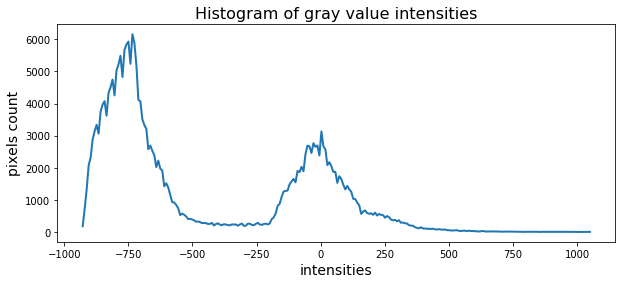

In [101]:
'''
Plot images histogram
'''
fig, axes = plt.subplots(figsize=(10,4))
axes.plot(hist_centers, hist, lw=2)
axes.set_title('Histogram of gray value intensities', fontsize=16)
axes.set_xlabel('intensities', fontsize=14)
axes.set_ylabel('pixels count', fontsize=14)

### Try different thresholding approaches

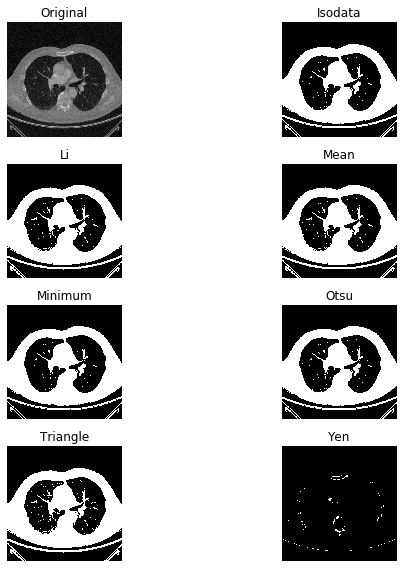

In [102]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(image_rescaled, figsize=(10, 8), verbose=False)
plt.show()

### 1. Otsu's Thresholding

In [103]:
from skimage.filters import threshold_otsu
#from skimage.morphology import erosion, dilation, disk
#threshold = threshold_otsu(image)
#th_image = image < threshold

In [104]:
'''
#Apply erosion on greyscale image
selem = disk(1)
eroded_img = erosion(image_rescaled, selem)
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
axes[0].imshow(image_rescaled, cmap=plt.cm.Greys_r)
axes[1].imshow(eroded_img, cmap=plt.cm.Greys_r)
'''

'\n#Apply erosion on greyscale image\nselem = disk(1)\neroded_img = erosion(image_rescaled, selem)\nfig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)\naxes[0].imshow(image_rescaled, cmap=plt.cm.Greys_r)\naxes[1].imshow(eroded_img, cmap=plt.cm.Greys_r)\n'

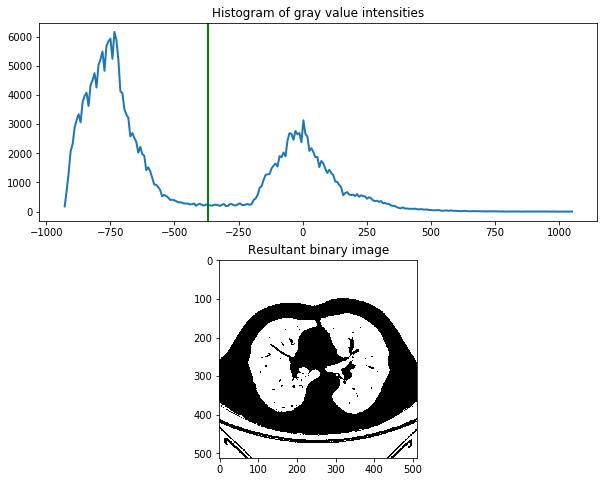

In [128]:
#Calculate optimum threshold with Otsu's thresholding
threshold = threshold_otsu(image_rescaled)
#segmented = np.where(image_rescaled<threshold, image_rescaled.min(), image_rescaled.max())
th_image = image_rescaled < threshold
#from skimage.morphology import closing, square
#th_image = closing(image_rescaled > threshold, square(3))
#th_image2 = eroded_img < threshold
'''
Plot binary image after thresholding
'''
#fig, axes = plt.subplots(1, 1, figsize=(10, 4), sharex=True, sharey=True)
#axes.imshow(th_image, cmap=plt.cm.Greys_r)
#axes[1].imshow(th_image2, cmap=plt.cm.Greys_r)
#segmented = np.where(image_rescaled<threshold, image_rescaled.min(), image_rescaled.max())
#%matplotlib inline
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
axes[0].plot(hist_centers, hist, lw=2)
axes[0].axvline(threshold, color='green', lw=2)
axes[0].set_title('Histogram of gray value intensities')
#axes[1].imshow(segmented, cmap=plt.cm.Greys_r)
axes[1].imshow(th_image, cmap=plt.cm.Greys_r)
axes[1].set_title('Resultant binary image')
#plt.imshow(th_image, cmap=plt.cm.Greys_r)
#plt.imshow(image<-0.01, cmap=plt.cm.Greys_r)
plt.show()

In [107]:
'''
Label regions
'''
from skimage.segmentation import clear_border, mark_boundaries
from skimage.measure import label, regionprops
#fist clear borders
clear = clear_border(th_image)
#next, label regions
#labelled_image = label(th_image)

In [108]:
labelled_image = label(clear)

In [109]:
#Compute region properties on labelled image
regions = regionprops(labelled_image)

In [111]:
#Create a list with all labelled images
regions_images = []
for label in np.unique(labelled_image):
    img = np.where(labelled_image==label, th_image.max(), 0)
    if regionprops(img)[0].area > 100:
        #print("True")
        regions_images.append(img)
    #print(len(regionprops(img)))
    #regions_images.append(img)

In [165]:
from skimage.color import label2rgb

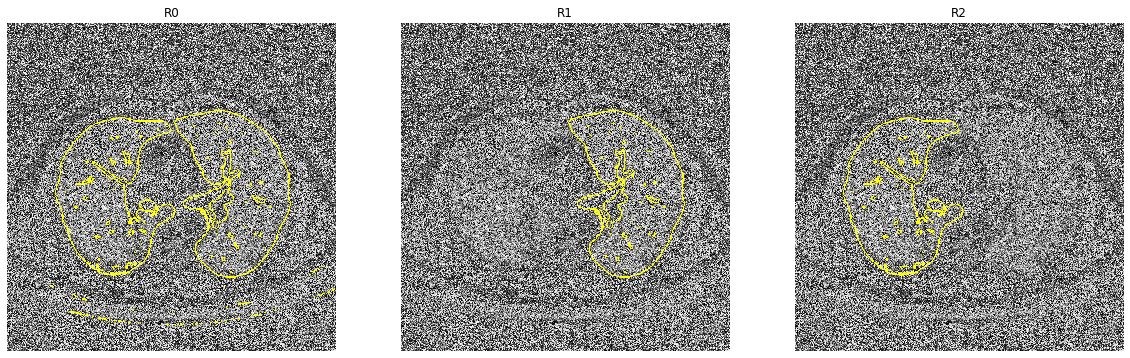

In [168]:
#Plot image regions
from skimage.util import img_as_float
#plt.imshow(regions_images[3])
f, axes = plt.subplots(1, len(regions_images), figsize=(20, 12))
for n in range(len(regions_images)):
    #axes[n].imshow(regions_images[n])
    axes[n].imshow(mark_boundaries((image_rescaled * 255).astype(np.uint8), np.where(regions_images[n]==1, 1, -1)), cmap=plt.cm.Greys_r)
    #axes[n].imshow(mark_boundaries(foo, regions_images[n]), cmap=plt.cm.Greys_r)
    axes[n].set_title("R%d"%n)
    axes[n].set_axis_off()